# GRIP: The Spark Foundation

## Data Science Business Analystics Intern- December 2022 [#GRIPDEC22] ##

## Author: Aswathi P


## Task 2: Prediction Using Unsupervised Machine Learning ##

### Predict the optimum number of cluster for the Iris data set

Importing the dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#To ignore the warnings
import warnings as wg
wg.filterwarnings("ignore")

#For ML model
from sklearn.cluster import KMeans

In [2]:
df=pd.read_csv(r"C:\SPARKS FOUNDATION\Iris.csv")

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.shape

(150, 6)

In [5]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
Ccheck data types
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [7]:
#Check missing values
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [8]:
#Check the unique entries in species column
df["Species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [10]:
Iris=df.drop(['Id'],axis=1)
Iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [11]:
Iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [12]:
#Frequency of the Species

IrisFreq=pd.crosstab(index=Iris["Species"], columns="count")
IrisFreq

col_0,count
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


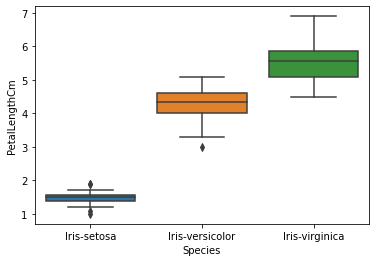

In [13]:
#Check outliers

sns.boxplot(x="Species",y="PetalLengthCm",data=Iris)
plt.show()

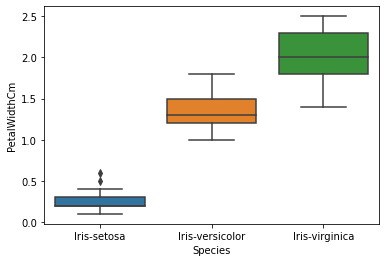

In [16]:
#Check outliers
sns.boxplot(x="Species",y="PetalWidthCm",data=Iris)
plt.show()

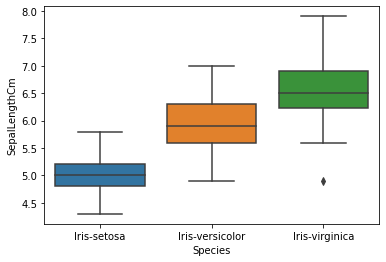

In [17]:
sns.boxplot(x="Species",y="SepalLengthCm",data=Iris)
plt.show()

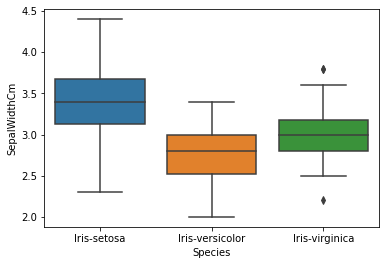

In [18]:
sns.boxplot(x="Species",y="SepalWidthCm",data=Iris)
plt.show()

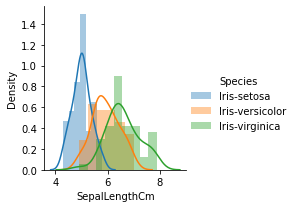

In [23]:
#Check the distribution of sepal length
sns.FacetGrid(Iris,hue="Species",size=3).map(sns.distplot,"SepalLengthCm").add_legend()
plt.show()

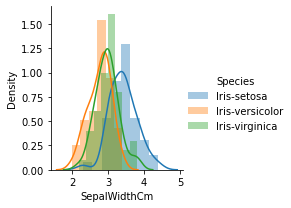

In [24]:
#Check the distribution of sepal width
sns.FacetGrid(Iris,hue="Species",size=3).map(sns.distplot,"SepalWidthCm").add_legend()
plt.show()

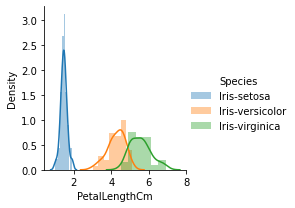

In [25]:
#Check the distribution of petal length
sns.FacetGrid(Iris,hue="Species",size=3).map(sns.distplot,"PetalLengthCm").add_legend()
plt.show()

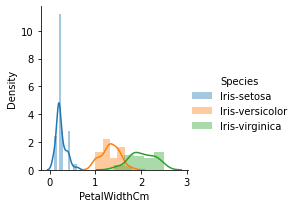

In [27]:
#Check the distribution of petal width
sns.FacetGrid(Iris,hue="Species",size=3).map(sns.distplot,"PetalWidthCm").add_legend()
plt.show()



Finding the optimum number of clusters

In [26]:
x=Iris.iloc[:, [0,1,2,3]].values
x[:5,:]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

### Model Fitting

In [29]:
fitted= []
for i in range(1,10):
    km=KMeans(n_clusters= i, init= 'k-means++',max_iter=300,n_init=10, random_state=0)
    km.fit(x)
    fitted.append(km.inertia_)

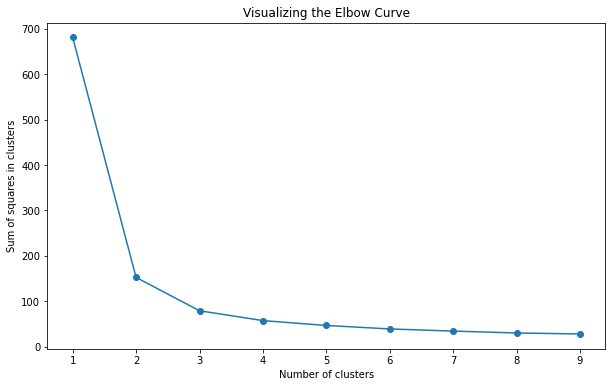

In [30]:
#Plotting the results onto a line graph, allowing us to obseve 'The elbow'

plt.figure(figsize=(10,6))
plt.plot(range(1,10),fitted,marker='o')
plt.title('Visualizing the Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squares in clusters') #within cluster sum of squares
plt.show()

Based on the above graph we choose the number of clusters as 3

## Training

In [35]:
#Creating the kmeans classifier
km=KMeans(n_clusters=3,init='k-means++',max_iter=300,n_init=10,random_state=0)
y_kmeans=km.fit_predict(x)
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [37]:
#Printing the centers of the clusters
print("Centers of the clusters:\n\n",km.cluster_centers_)

Centers of the clusters:

 [[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.418      1.464      0.244     ]
 [6.85       3.07368421 5.74210526 2.07105263]]


## Predicting the Optimum Clusters 

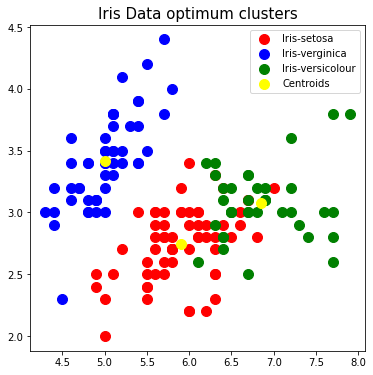

In [39]:
#Visualising the clusters-on the first two columns
plt.figure(figsize=(6,6))
plt.scatter(x[y_kmeans==0,0],x[y_kmeans==0,1],s=100,c='Red',label='Iris-setosa')
plt.scatter(x[y_kmeans==1,0],x[y_kmeans==1,1],s=100,c='Blue',label='Iris-verginica')
plt.scatter(x[y_kmeans==2,0],x[y_kmeans==2,1],s=100,c='Green',label='Iris-versicolour')
#Plotting the centroids of the clusters
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],s=100,c='Yellow',label='Centroids')
plt.title("Iris Data optimum clusters",fontsize=15)
plt.legend()
plt.show()
